# Classificação

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print('Versões:')
print(f'-Tensorflow: {tf.__version__}')
print(f'-Keras: {keras.__version__}')

Versões:
-Tensorflow: 2.17.0
-Keras: 3.4.1


## Fashion MNIST

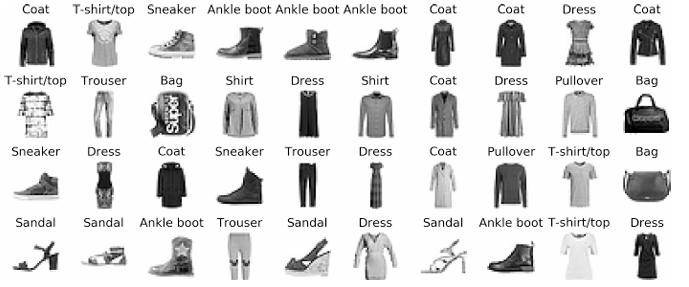

### Preparando dados

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # Reconhecimento de peças de roupa
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train_full)

60000

In [ ]:
# 255 é escolhido devido à paleta de seleção RGB
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["Camiseta", "Calça", "Manga Longa", "Vestido", "Casaco",
               "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)
y_test = le.fit_transform(y_test)

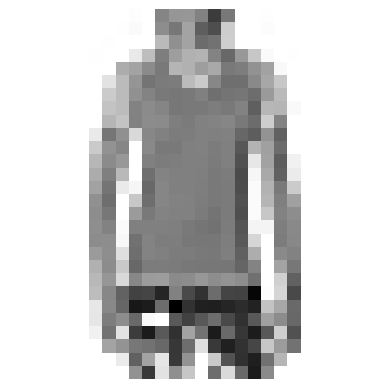

In [ ]:
num = np.random.randint(0,
                        1000)


plt.imshow(X_train[num],
           cmap='binary')

plt.axis('off')
plt.show()

In [ ]:
X_train[num].shape

(28, 28)

### Preparando a rede

O neurônio artificial consiste de 2 etapas. A primeira é a somatória ponderada dos sinais de entrada, que em seguida são aplicados a uma função de ativação

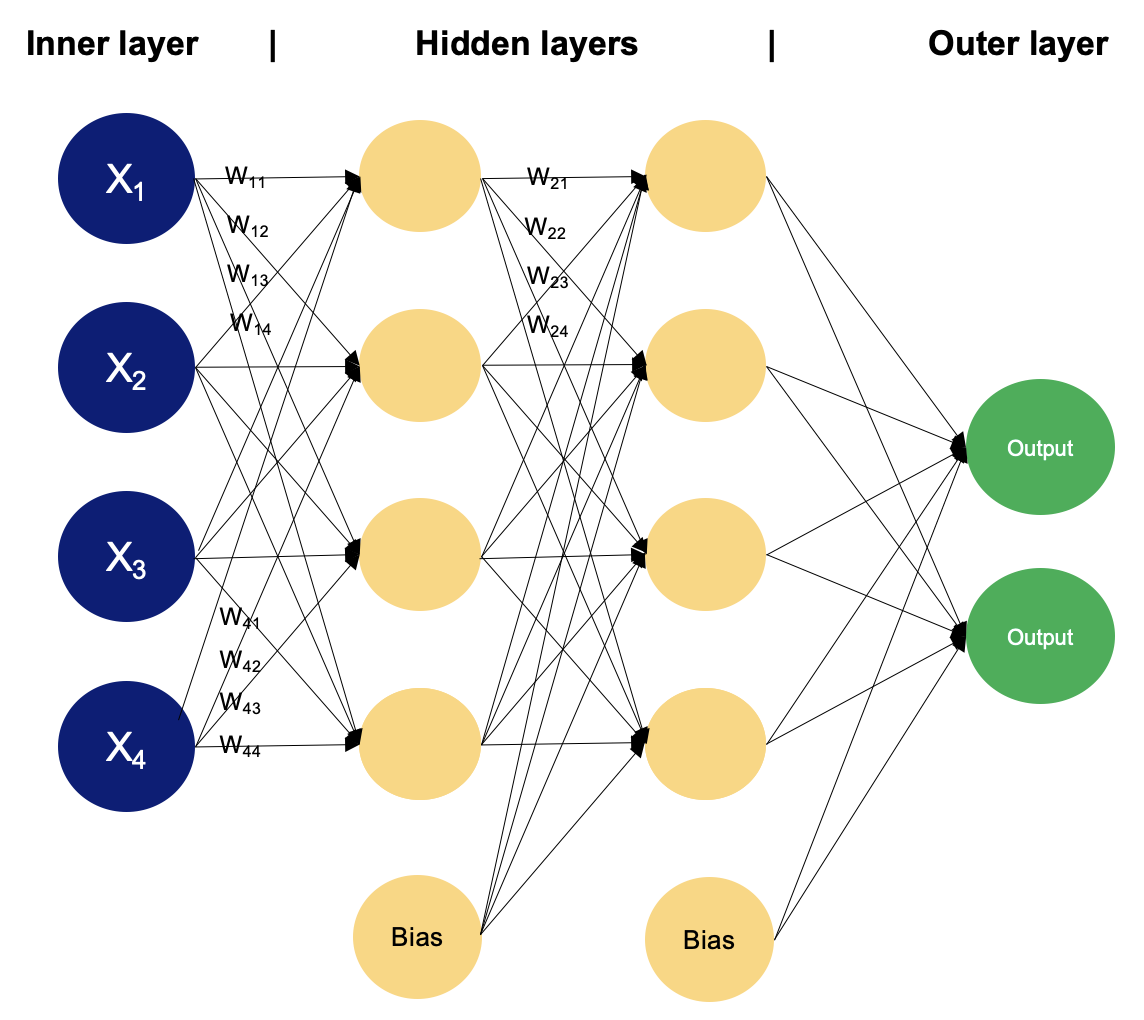

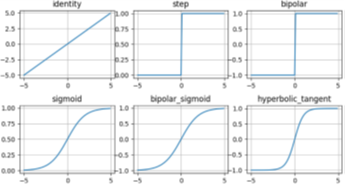

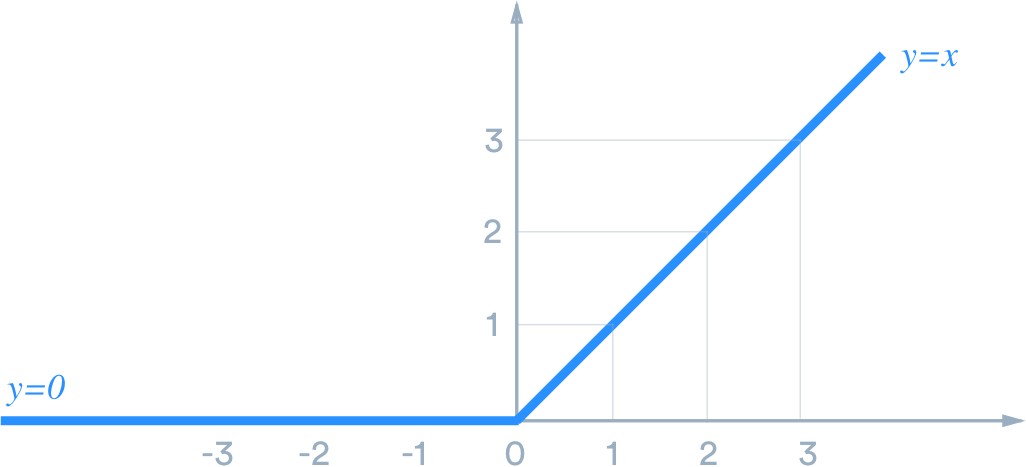

In [ ]:
model = keras.models.Sequential()

# Recebe da Camada de Entrada: Transformando em 1d-array
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Camadas profundas
model.add(keras.layers.Dense(300, activation="relu")) #300 neurônios
model.add(keras.layers.Dense(100, activation="relu")) #100 neurônios

# Camada de Saída com 10 neurônios
model.add(keras.layers.Dense(10, activation="softmax")) # 10 Neurônios de saída

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
weights,biases = [],[]

for i in model.layers:
    print(f'-Camada :  {i.name}')
    if i.name == model.layers[0].name:
        print('- Não há informações')
        continue
    else:
        print(f'-Pesos: {i.get_weights()[0].shape}')
        print(f'-Bias: {i.get_weights()[1].shape}')
        weights.append(i.get_weights()[0]) #acessando os tensores
        biases.append(i.get_weights()[1])

-Camada :  flatten_2
- Não há informações
-Camada :  dense_6
-Pesos: (784, 300)
-Bias: (300,)
-Camada :  dense_7
-Pesos: (300, 100)
-Bias: (100,)
-Camada :  dense_8
-Pesos: (100, 10)
-Bias: (10,)


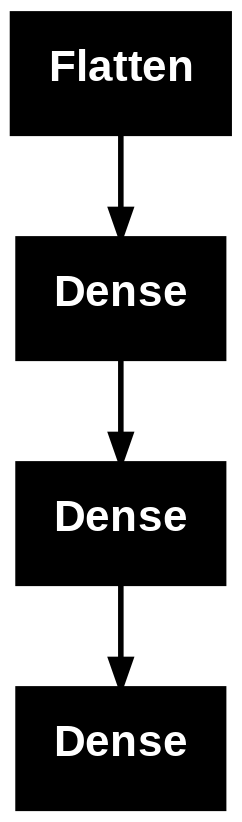

In [ ]:
keras.utils.plot_model(model)

### Compile():
O metodo Compile é chamado para especificar a **Função de Perda** e **Otimizador**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', # Categorias esparsas e sem interseção
              optimizer='sgd', #Stochastic Gradient Descending
              metrics = ['accuracy']) # Métrica de avaliação

# Treinando o modelo

In [ ]:
history = model.fit(X_train, y_train,
          epochs=30,
          validation_data= (X_valid, y_valid)validation_data= (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6765 - loss: 0.9924 - val_accuracy: 0.8246 - val_loss: 0.5146
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8262 - loss: 0.5013 - val_accuracy: 0.8490 - val_loss: 0.4451
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8429 - loss: 0.4486 - val_accuracy: 0.8630 - val_loss: 0.4092
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8557 - loss: 0.4161 - val_accuracy: 0.8624 - val_loss: 0.3936
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8610 - loss: 0.3951 - val_accuracy: 0.8688 - val_loss: 0.3805
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8636 - loss: 0.3841 - val_accuracy: 0.8650 - val_loss: 0.3831
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8724 - loss: 0.3637 - val_accuracy: 0.8732 - val_loss: 0.3623
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8744 - loss: 0.3544 

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
history.history

{'accuracy': [0.7632908821105957,
  0.8327636122703552,
  0.8469454646110535,
  0.8570363521575928,
  0.8615454435348511,
  0.8672363758087158,
  0.8715090751647949,
  0.8756909370422363,
  0.8777999877929688,
  0.8820000290870667,
  0.8842363357543945,
  0.8873454332351685,
  0.8885818123817444,
  0.8919273018836975,
  0.893745481967926,
  0.8956000208854675,
  0.8972545266151428,
  0.899290919303894,
  0.9016000032424927,
  0.9035454392433167,
  0.9047272801399231,
  0.9047454595565796,
  0.9069091081619263,
  0.909600019454956,
  0.9107818007469177,
  0.9120000004768372,
  0.9143272638320923,
  0.9149636626243591,
  0.9165999889373779,
  0.9179454445838928],
 'loss': [0.7134658098220825,
  0.48329147696495056,
  0.439822793006897,
  0.4118008315563202,
  0.3932136297225952,
  0.3775978088378906,
  0.36294686794281006,
  0.3516639173030853,
  0.3429642617702484,
  0.3336879312992096,
  0.323701411485672,
  0.3168203830718994,
  0.30950674414634705,
  0.303301602602005,
  0.2961856126

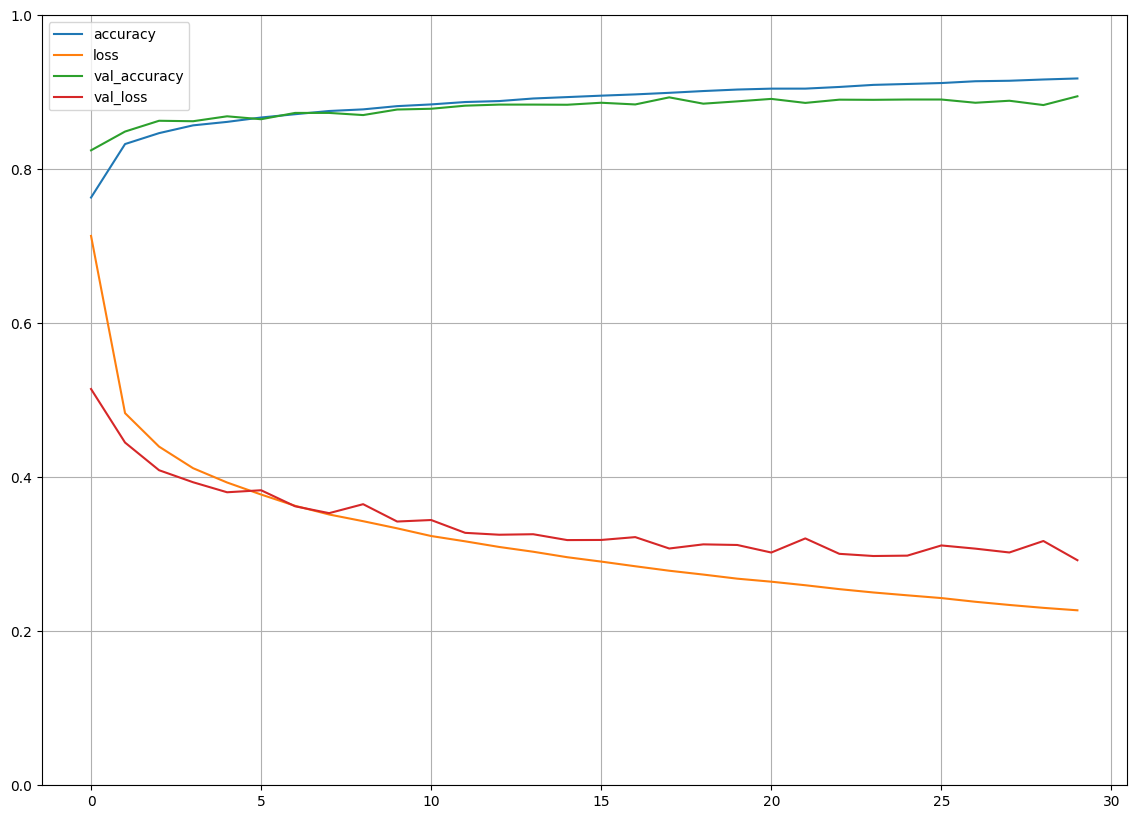

In [ ]:
pd.DataFrame(history.history).plot(figsize=(14,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 56.0926


[59.45380783081055, 0.8550000190734863]

In [ ]:
np.random.shuffle(X_train)

X_sample = X_train[:3]
y_proba = model.predict(X_sample)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.  , 0.  , 0.28, 0.  , 0.01, 0.  , 0.69, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

# Regressão

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
# Vamos aplicar o scaler apenas nas features para facilitar o processo
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
# model_reg = keras.models.Sequential([
#     keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
#     keras.layers.Dense(1)
# ])

model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(30, activation='relu',
                                 input_shape=X_train.shape[1:]))
model_reg.add(keras.layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_reg.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

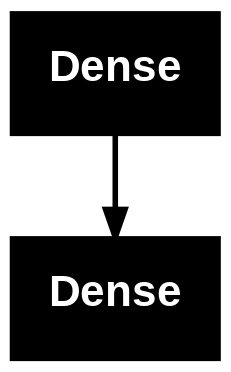

In [ ]:
keras.utils.plot_model(model_reg)

In [ ]:
model_reg.compile(loss='mean_squared_error',
              optimizer='sgd')

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,          # Number of epochs to wait after last improvement
                               restore_best_weights=True)  # Restores model weights from the epoch with the best value of the monitored quantity


In [ ]:
history = model_reg.fit(X_train, y_train,
                        epochs=30,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5184 - val_loss: 0.5918
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5162 - val_loss: 0.4193
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4420 - val_loss: 0.3941
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3987 - val_loss: 0.3916
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3899 - val_loss: 0.3902
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3969 - val_loss: 0.3757
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3759 - val_loss: 0.3675
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3663
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3796 - val_loss: 0.3667
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3640 - val_loss: 0.3626
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3779 - val_loss: 0.3646
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [ ]:
model_reg.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3341


0.353996217250824